# Using Data Science to Understand What Makes Wine Taste Good

## Section 1: Data Exploration

In this section, we'll do some exploratory analysis to understand the nature of our data and the underlying distribution.

### First, import some necessary libraries. 

### Click the below cell block and run it.

In [7]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 


from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames
from pathlib import Path

import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('precision', 3) 

### Next, we'll load the dataset for white wines, and display the first 5 columns. Run the below cell block

In [8]:
# Load the Red Wines dataset
data = pd.read_csv('../data/raw/winequality-white.csv')

# Display the first five records
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.995,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6


## Now, let's do some basic preliminary analysis of our data:

### We'll begin by first seeing if our data has any missing information

In [9]:
# buscar nulos
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

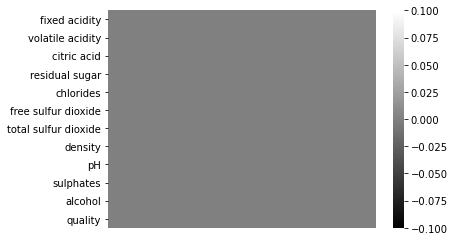

In [10]:
sns.heatmap(data.isnull().T, xticklabels=False, cmap='gray')

No se tienen valores nulos

### Examine the features in the data-set and their data types

In [11]:
# información de tipos de variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [12]:
# analitica descriptiva básica
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000
mean,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


# Section 2: Exploring Relationships between features

In [13]:
# Explorar las relaciones entre variables

In [14]:
# Matriz de correlaciones
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.023,0.289,0.089,0.023,-4.940e-02,0.091,0.265,-4.259e-01,-0.017,-0.121,-0.114
volatile acidity,-0.023,1.000,-0.149,0.064,0.071,-9.701e-02,0.089,0.027,-3.192e-02,-0.036,0.068,-0.195
citric acid,0.289,-0.149,1.000,0.094,0.114,9.408e-02,0.121,0.150,-1.637e-01,0.062,-0.076,-0.009
residual sugar,0.089,0.064,0.094,1.000,0.089,2.991e-01,0.401,0.839,-1.941e-01,-0.027,-0.451,-0.098
chlorides,0.023,0.071,0.114,0.089,1.000,1.014e-01,0.199,0.257,-9.044e-02,0.017,-0.360,-0.210
free sulfur dioxide,-0.049,-0.097,0.094,0.299,0.101,1.000e+00,0.616,0.294,-6.178e-04,0.059,-0.250,0.008
total sulfur dioxide,0.091,0.089,0.121,0.401,0.199,6.155e-01,1.000,0.530,2.321e-03,0.135,-0.449,-0.175
density,0.265,0.027,0.150,0.839,0.257,2.942e-01,0.530,1.000,-9.359e-02,0.074,-0.780,-0.307
pH,-0.426,-0.032,-0.164,-0.194,-0.090,-6.178e-04,0.002,-0.094,1.000e+00,0.156,0.121,0.099
sulphates,-0.017,-0.036,0.062,-0.027,0.017,5.922e-02,0.135,0.074,1.560e-01,1.000,-0.017,0.054


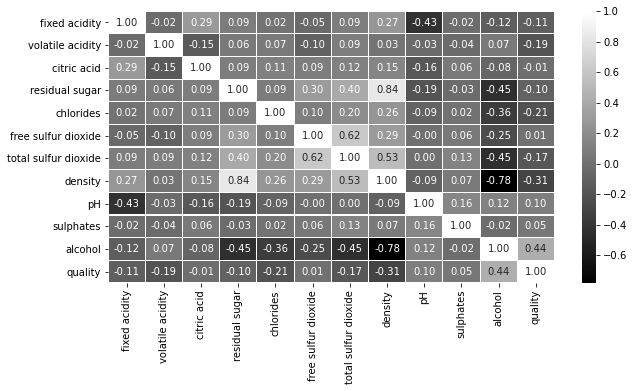

In [15]:

# sugerencia 2: sns.heatmap()
fig = plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), linewidths=0.1, cmap='gray', annot=True, fmt='.2f' )

In [16]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]
fixedAcidity_pH.head()

,pH,fixed acidity
0,3.00,7.0
1,3.30,6.3
2,3.26,8.1
3,3.19,7.2
4,3.19,7.2


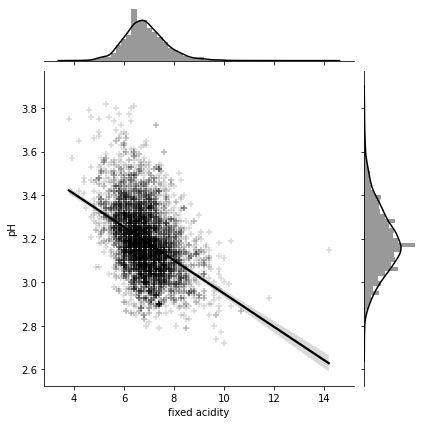

In [17]:
sns.jointplot('fixed acidity', 'pH', data=fixedAcidity_pH, 
              kind='reg', color='black', marker='+',
              joint_kws = {'scatter_kws':dict(alpha=0.15)})

#### Citric_acid and fixed acidity

In [18]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

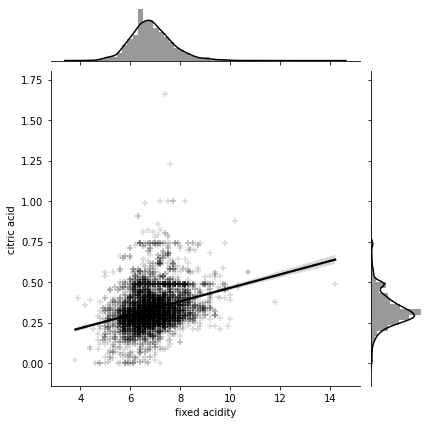

In [19]:
fixedAcidity_citric = data[['citric acid', 'fixed acidity']]
sns.jointplot('fixed acidity', 'citric acid', data=fixedAcidity_citric, 
              kind='reg', color='black', marker='+',
              joint_kws = {'scatter_kws':dict(alpha=0.15,)})

#### density and fixed acidity

In [1]:
fixedAcidity_density = data[['density', 'fixed acidity']]
sns.jointplot('fixed acidity', 'density', data=fixedAcidity_density, 
              kind='reg', color='black', marker='+',
              joint_kws = {'scatter_kws':dict(alpha=0.15)})

NameError: name 'data' is not defined

#### quality and volatile acidity

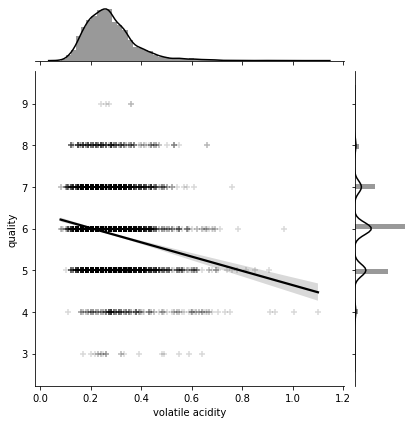

In [21]:
quality_volatileacidity = data[['quality', 'volatile acidity']]
sns.jointplot('volatile acidity', 'quality', data=quality_volatileacidity, 
              kind='reg', color='black', marker='+',
              joint_kws = {'scatter_kws':dict(alpha=0.15)})

#### alcohol and quality

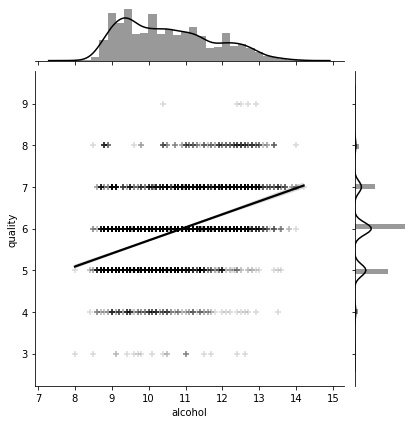

In [22]:
quality_alcohol = data[['alcohol', 'quality']]
sns.jointplot('alcohol', 'quality', data=quality_alcohol, 
              kind='reg', color='black', marker='+',
              joint_kws = {'scatter_kws':dict(alpha=0.15)})

#### Barplot quality and volatile acidity

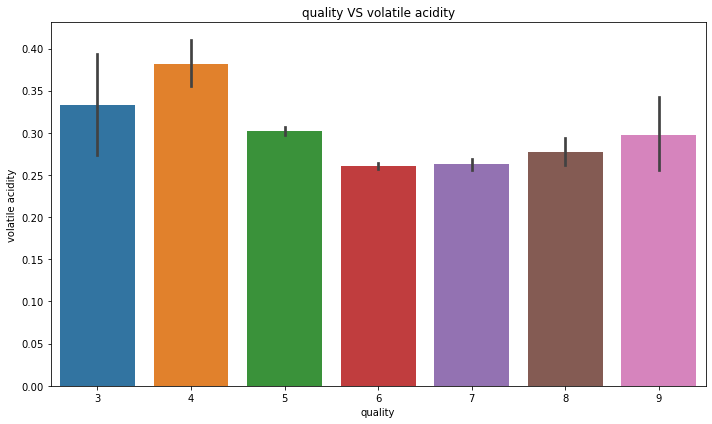

<Figure size 432x288 with 0 Axes>

In [23]:
#We can visualize relationships of discreet values better with a bar plot

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=quality_volatileacidity, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

#### Barplot quality and alcohol

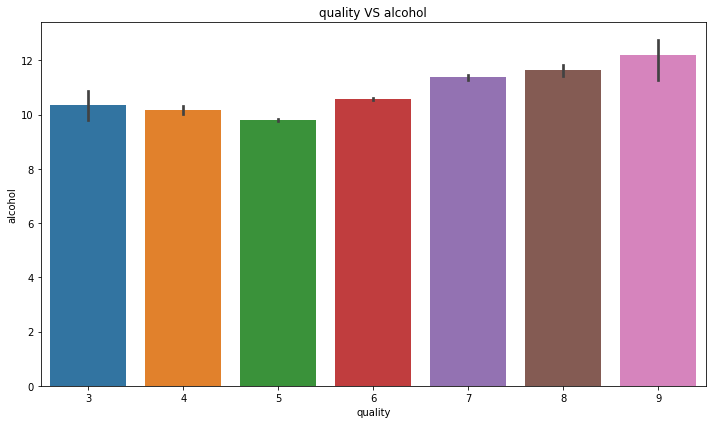

<Figure size 432x288 with 0 Axes>

In [24]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

## Outlier Detection:

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An **outlier step** is calculated as **1.5** times the **interquartile range (IQR)**. A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below:

* Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
* Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
* Assign the calculation of an outlier step for the given feature to step.
* Optionally remove data points from the dataset by adding indices to the outliers list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [25]:
# For each feature find the data points with extreme high or low values


for feature in data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    aux = ~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))
    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.996,2.89,0.30,10.1,4
169,9.8,0.420,0.48,9.85,0.034,5.0,110.0,0.996,2.87,0.29,10.0,5
207,10.2,0.440,0.88,6.20,0.049,20.0,124.0,0.997,2.99,0.51,9.9,4
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.997,3.23,0.38,8.5,3
358,10.0,0.200,0.39,1.40,0.050,19.0,152.0,0.994,3.00,0.42,10.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4679,4.7,0.335,0.14,1.30,0.036,69.0,168.0,0.992,3.47,0.46,10.5,5
4786,4.4,0.320,0.39,4.30,0.030,31.0,127.0,0.989,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.20,0.030,29.0,118.0,0.989,3.57,0.36,12.8,8
4792,4.7,0.785,0.00,3.40,0.036,23.0,134.0,0.990,3.53,0.92,13.8,6


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.989,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.989,3.33,0.39,12.8,8
23,7.6,0.670,0.14,1.5,0.074,25.0,168.0,0.994,3.05,0.51,9.3,5
79,6.7,0.540,0.28,5.4,0.060,21.0,105.0,0.995,3.27,0.37,9.0,5
147,6.4,0.595,0.14,5.2,0.058,15.0,97.0,0.995,3.38,0.36,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4847,4.4,0.540,0.09,5.1,0.038,52.0,97.0,0.990,3.41,0.40,12.2,7
4860,6.0,0.520,0.33,7.7,0.046,24.0,119.0,0.992,3.04,0.38,11.0,6
4867,5.3,0.600,0.34,1.4,0.031,3.0,60.0,0.989,3.27,0.38,13.0,6
4877,5.9,0.540,0.00,0.8,0.032,12.0,82.0,0.993,3.25,0.36,8.8,5


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.000,2.98,0.67,9.7,5
16,6.3,0.48,0.04,1.10,0.046,30.0,99.0,0.993,3.24,0.36,9.6,6
54,6.8,0.20,0.59,0.90,0.147,38.0,132.0,0.993,3.05,0.38,9.1,6
62,7.0,0.47,0.07,1.10,0.035,17.0,151.0,0.991,3.02,0.34,10.5,5
65,6.2,0.35,0.03,1.20,0.064,29.0,120.0,0.993,3.22,0.54,9.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4808,7.3,0.35,0.67,8.30,0.053,10.0,100.0,0.996,3.19,0.50,10.9,5
4815,6.2,0.76,0.01,3.20,0.041,18.0,120.0,0.990,3.20,0.94,13.7,7
4847,4.4,0.54,0.09,5.10,0.038,52.0,97.0,0.990,3.41,0.40,12.2,7
4877,5.9,0.54,0.00,0.80,0.032,12.0,82.0,0.993,3.25,0.36,8.8,5


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1608,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.002,2.98,0.47,8.6,5
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.010,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.010,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.039,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.003,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.003,3.06,0.42,10.6,6
4480,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.996,3.10,0.35,12.8,5


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
23,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.994,3.05,0.51,9.30,5
35,7.3,0.28,0.43,1.7,0.080,21.0,123.0,0.991,3.19,0.42,12.80,5
40,6.7,0.23,0.39,2.5,0.172,63.0,158.0,0.994,3.11,0.36,9.40,6
41,6.7,0.24,0.39,2.9,0.173,63.0,157.0,0.994,3.10,0.34,9.40,6
54,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.993,3.05,0.38,9.10,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4813,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.992,3.10,0.45,9.70,5
4820,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.992,3.10,0.45,9.70,5
4836,6.7,0.50,0.36,11.5,0.096,18.0,92.0,0.996,3.11,0.49,9.60,5
4845,6.6,0.38,0.29,2.4,0.136,15.0,93.0,0.993,3.18,0.60,9.50,5


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
67,6.7,0.250,0.13,1.20,0.041,81.0,174.0,0.992,3.14,0.42,9.8,5
297,7.2,0.190,0.46,3.80,0.041,82.0,187.0,0.993,3.19,0.60,11.2,7
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.995,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.994,3.12,0.66,10.1,5
395,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.992,3.18,0.41,10.0,5
405,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.992,3.18,0.41,10.0,5
459,6.1,0.430,0.35,9.10,0.059,83.0,249.0,0.997,3.37,0.50,8.5,5
659,6.8,0.290,0.16,1.40,0.038,122.5,234.5,0.992,3.15,0.47,10.0,4
752,6.7,0.200,0.42,14.00,0.038,83.0,160.0,0.999,3.16,0.50,9.4,6
766,6.7,0.500,0.63,13.40,0.078,81.0,238.0,0.999,3.08,0.44,9.2,5


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
227,7.1,0.250,0.32,10.30,0.041,66.0,272.0,0.997,3.17,0.52,9.1,6
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.995,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.994,3.12,0.66,10.1,5
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.992,3.31,0.37,12.6,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.000,3.04,0.63,11.0,3
1931,7.1,0.490,0.22,2.00,0.047,146.5,307.5,0.992,3.24,0.37,11.0,3
1940,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.000,2.93,0.64,8.6,5
1942,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.000,2.93,0.64,8.6,5
2127,9.1,0.330,0.38,1.70,0.062,50.5,344.0,0.996,3.10,0.70,9.5,5
2378,9.4,0.230,0.56,16.45,0.063,52.5,282.0,1.001,3.10,0.51,9.3,5


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.010,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.010,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.039,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.003,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.003,3.06,0.42,10.6,6


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
72,6.0,0.270,0.28,4.8,0.063,31.0,201.0,0.996,3.69,0.71,10.0,5
115,5.5,0.485,0.00,1.5,0.065,8.0,103.0,0.994,3.63,0.40,9.7,4
250,5.9,0.210,0.28,4.6,0.053,40.0,199.0,0.996,3.72,0.70,10.0,4
320,6.0,0.100,0.24,1.1,0.041,15.0,65.0,0.993,3.61,0.61,10.3,7
507,6.0,0.240,0.27,1.9,0.048,40.0,170.0,0.994,3.64,0.54,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4565,5.8,0.280,0.66,9.1,0.039,26.0,159.0,0.997,3.66,0.55,10.8,5
4567,5.8,0.280,0.66,9.1,0.039,26.0,159.0,0.997,3.66,0.55,10.8,5
4601,6.9,0.230,0.35,6.9,0.030,45.0,116.0,0.992,2.80,0.54,11.0,6
4744,5.0,0.240,0.19,5.0,0.043,17.0,101.0,0.994,3.67,0.57,10.0,5


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,6.8,0.220,0.31,1.4,0.053,34.0,114.0,0.993,3.39,0.77,10.600,6
154,8.2,0.230,0.40,7.5,0.049,12.0,76.0,0.997,3.06,0.84,9.700,6
209,6.1,0.400,0.31,0.9,0.048,23.0,170.0,0.993,3.22,0.77,9.500,6
245,6.1,0.180,0.36,2.0,0.038,20.0,249.5,0.992,3.37,0.79,11.300,6
339,6.6,0.180,0.35,1.5,0.049,49.0,141.0,0.993,3.43,0.85,10.200,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4792,4.7,0.785,0.00,3.4,0.036,23.0,134.0,0.990,3.53,0.92,13.800,6
4815,6.2,0.760,0.01,3.2,0.041,18.0,120.0,0.990,3.20,0.94,13.700,7
4818,6.0,0.270,0.40,1.7,0.021,18.0,82.0,0.989,3.24,0.95,13.133,6
4886,6.2,0.210,0.28,5.7,0.028,45.0,121.0,0.992,3.21,1.08,12.150,7


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.989,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.989,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.993,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.993,3.33,0.64,10.7,8
74,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.993,3.33,0.64,10.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.989,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.992,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.989,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.989,3.57,0.36,12.8,8


# Part 2: Using Machine Learning to Predict the Quality of Wines

First we are going to try using linear regression to see what happen

In [26]:
#Displays the first 2 columns
data.iloc[:, :2]

,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30
2,8.1,0.28
3,7.2,0.23
4,7.2,0.23
...,...,...
4893,6.2,0.21
4894,6.6,0.32
4895,6.5,0.24
4896,5.5,0.29


In [27]:
# Split the data into features and target label
features = data.iloc[:, :-1].values
target = data.iloc[:, -1].values

### Next, shuffle and split our data-set into training and testing subsets:

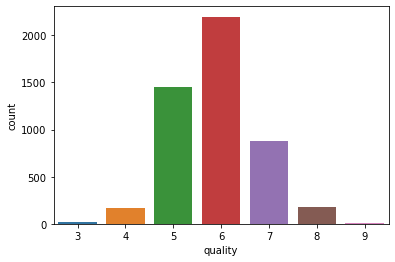

In [28]:
sns.countplot(data['quality'])

In [29]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [30]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.3, 
                                                    random_state=88)

# Show the results of the split
print(f' X_train.shape : {X_train.shape}, y_train.shape : {y_train.shape}')
print(f' X_test.shape : {X_test.shape}, y_test.shape : {y_test.shape}')

 X_train.shape : (3428, 11), y_train.shape : (3428,)
 X_test.shape : (1470, 11), y_test.shape : (1470,)


### Implementation: Initial Model Evaluation


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge

In [39]:

def display_scores(scores, metric):
  for m in metric:
    name = 'test_'+m.lower()
    print('='*30)
    print('Metric:', m)
    print('Mean:', scores[name].mean())
    print('Standard deviation:', scores[name].std())

def evaluate_model(model, x, y):
    """ Evaluate the model using Stratified KFold """
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)
    scoring = {'mse': make_scorer(mean_squared_error),
               'r2': make_scorer(r2_score)}
    scores = cross_validate(model, x, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=0)
    return scores



In [40]:
from functools import partial

metrics = ['MSE', 'R2']
display_scores = partial(display_scores, metric=metrics)

# Linear Regression

In [41]:
lr_pipline = Pipeline(steps=[('sc', StandardScaler()),
                             ('lr', LinearRegression())])

lr_pipline.fit(X_train, y_train)
scores = evaluate_model(lr_pipline, X_train, y_train)

display_scores(scores)
accuracy = lr_pipline.score(X_test,y_test)
print('='*30)
print("Accuracy: {}".format(accuracy))


Metric: MSE
Mean: 0.5711031313466379
Standard deviation: 0.03243457915391726
Metric: R2
Mean: 0.2677575301105744
Standard deviation: 0.040730353515205334
Accuracy: 0.2805987328049383


# Lasso

In [42]:
lr_pipline = Pipeline(steps=[('sc', StandardScaler()),
                             ('lr', Lasso())])

lr_pipline.fit(X_train, y_train)
scores = evaluate_model(lr_pipline, X_train, y_train)

display_scores(scores)
accuracy = lr_pipline.score(X_test,y_test)
print('='*30)
print("Accuracy: {}".format(accuracy))

Metric: MSE
Mean: 0.7799967896668153
Standard deviation: 0.008336560628281513
Metric: R2
Mean: -8.406080708021512e-05
Standard deviation: 5.4518320024484535e-05
Accuracy: -8.54334577953253e-05


# Ridge

In [43]:
lr_pipline = Pipeline(steps=[('sc', StandardScaler()),
                             ('lr', Ridge())])

lr_pipline.fit(X_train, y_train)
scores = evaluate_model(lr_pipline, X_train, y_train)

display_scores(scores)
accuracy = lr_pipline.score(X_test,y_test)
print('='*30)
print("Accuracy: {}".format(accuracy))

Metric: MSE
Mean: 0.5701258066620266
Standard deviation: 0.043856370556246194
Metric: R2
Mean: 0.26896841289322687
Standard deviation: 0.056342289372262294
Accuracy: 0.2805769711488988


In [44]:
def models():
  models = [('Linnear Regression', Pipeline(steps=[('sc', RobustScaler()),
                                                   ('lr', LinearRegression())])),
            ('Lasso', Pipeline(steps=[('sc', RobustScaler()),
                             ('lr', Lasso())])),
            ('Ridge', Pipeline(steps=[('sc', RobustScaler()),
                             ('lr', Ridge())]))
            ]
  for name, model in models:
    yield name, model


--------------------
Linnear Regression
Metric: MSE
Mean: 0.5701888372249606
Standard deviation: 0.04003789217697872
Metric: R2
Mean: 0.26881910090417327
Standard deviation: 0.05224208390028372

--------------------
Lasso
Metric: MSE
Mean: 0.7799967896668152
Standard deviation: 0.008336560628281463
Metric: R2
Mean: -8.406080708021957e-05
Standard deviation: 5.451832002443679e-05

--------------------
Ridge
Metric: MSE
Mean: 0.5704520241788906
Standard deviation: 0.03663325376957441
Metric: R2
Mean: 0.26870687301768803
Standard deviation: 0.04429979211458056



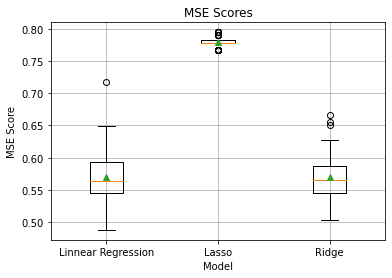

In [46]:
results = []
names = []

for name, model in models():
    print('-'*20)
    print(name)
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores['test_mse'])
    names.append(name)
    display_scores(scores)
    print()
    
plt.boxplot(results, labels=names, showmeans=True)
plt.title('MSE Scores')
plt.xlabel('Model')
plt.ylabel('MSE Score')
plt.grid()
plt.show()